<h1 align="center"><font size = 14>Hands-On Machine Learning</font></h1>
<h3 align="center"><font size = 7>Polynomial Regression</font></h3>
<h3 align="center">Zahra Amini</h3>
<br>
<br>
<br>
<br>
<br>

# Step0: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import PolynomialFeatures

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn import metrics

# Step1: Read Data

The Boston house-price data

 Variables in order:
 
 <b>CRIM: </b>     per capita crime rate by town
 
 <b>ZN: </b>       proportion of residential land zoned for lots over 25,000 sq.ft.
 
 <b>INDUS: </b>    proportion of non-retail business acres per town
 
 <b>CHAS: </b>     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 
 <b>NOX: </b>      nitric oxides concentration (parts per 10 million)
 
 <b>RM: </b>       average number of rooms per dwelling
 
 <b>AGE: </b>      proportion of owner-occupied units built prior to 1940
 
 <b>DIS: </b>      weighted distances to five Boston employment centres
 
 <b>RAD: </b>      index of accessibility to radial highways
 
 <b>TAX: </b>      full-value property-tax rate per 10,000
 
 <b>PTRATIO: </b>  pupil-teacher ratio by town
 
 <b>B: </b>        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 
 <b>LSTAT: </b>    % lower status of the population
 
 <b>MEDV: </b>     Median value of owner-occupied homes in 1000's

In [13]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price']
df = pd.read_csv('Boston_house_price.csv', delimiter="\s+", names=column_names)

In [15]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# Step2: X, y

In [19]:
X=df.drop('Price', axis=1)

y = df['Price']

# Step3: Linear Regression

### train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
X_train.shape, X_test.shape

((354, 13), (152, 13))

### Creat the Model

In [25]:
LR = LinearRegression()

### Train the Model

In [27]:
LR.fit(X_train, y_train)

LinearRegression()

In [33]:
LR.coef_#.shape

array([-8.85049752e-02,  5.02928536e-02,  2.03483110e-02,  3.75427054e+00,
       -1.77483714e+01,  3.24776492e+00,  1.20008182e-02, -1.40916141e+00,
        2.63880691e-01, -1.03440009e-02, -9.51780874e-01,  6.11600491e-03,
       -5.97133217e-01])

###  Prediction & Evaluation

In [35]:
y_pred = LR.predict(X_test)

In [37]:
MAE_lr = metrics.mean_absolute_error(y_test, y_pred)

MAE_lr

3.835696361418935

# Step4: PolynomialFeatures

In [39]:
poly = PolynomialFeatures(degree=2, include_bias=True)

In [41]:
poly_X = poly.fit_transform(X)

In [43]:
poly_X.shape

(506, 105)

# Step5: train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.3,
                                                   random_state=101)

# Step6: Polynomial Regression

### Creat the Model

In [47]:
poly_model = LinearRegression()

###  Train the Model

In [49]:
poly_model.fit(X_train, y_train)

LinearRegression()

###  Prediction & Evaluation

In [51]:
y_pred = poly_model.predict(X_test)

In [53]:
MAE_p = metrics.mean_absolute_error(y_test, y_pred)

In [55]:
MAE_lr, MAE_p

(3.835696361418935, 2.838844164107975)

# Step7: Choose Degree

In [57]:
train_RMSE_list = []

test_RMSE_list = []

In [59]:
for d in range(1, 10):
    # feature
    polyfeature = PolynomialFeatures(degree=d, include_bias=True)
    poly_X = polyfeature.fit_transform(X)

    # train test 
    X_train, X_test, y_train, y_test = train_test_split(poly_X, y,
                                                       test_size=0.3,
                                                       random_state=101)
    #creat model
    PolyModel = LinearRegression()
    #train
    PolyModel.fit(X_train, y_train)
    #predict
    y_train_pred = PolyModel.predict(X_train)
    y_test_pred = PolyModel.predict(X_test)
    #RMSE
    train_RMSE = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    test_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
        
    train_RMSE_list.append(train_RMSE)
    
    test_RMSE_list.append(test_RMSE)
    

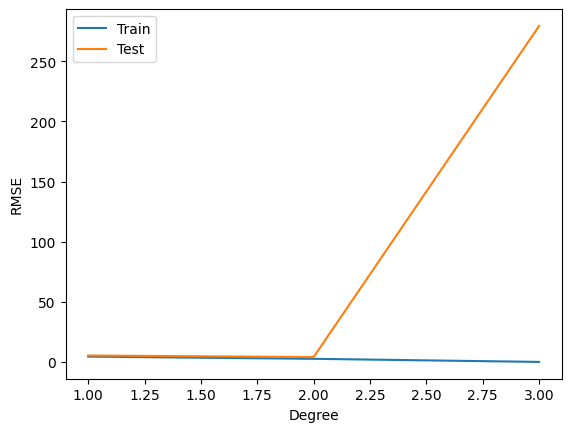

In [63]:
plt.plot(range(1,4), train_RMSE_list[:3], label='Train')
plt.plot(range(1,4), test_RMSE_list[:3], label='Test')

plt.xlabel('Degree')

plt.ylabel('RMSE')

plt.legend()

# Finished!